# PCA - N Dimensions

Run PCA on the Bank Marketing Data

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
bank = pd.read_csv("data/bank.csv")

In [5]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Preprocessing the data

In [6]:
from sklearn import preprocessing

In [7]:
le = preprocessing.LabelEncoder()

In [8]:
df = bank.apply(le.fit_transform)

In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,0,1,1,0,2288,1,0,2,4,8,1021,0,0,0,3,1
1,38,0,1,1,0,469,0,0,2,4,8,1283,0,0,0,3,1
2,23,9,1,1,0,1618,1,0,2,4,8,1246,0,0,0,3,1
3,37,7,1,1,0,2356,1,0,2,4,8,577,0,0,0,3,1
4,36,0,1,2,0,608,0,0,2,4,8,671,1,0,0,3,1


In [10]:
X = df.iloc[:,:16]

In [11]:
y = df.iloc[:,16]

In [12]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

## PCA using sklearn

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=2)

In [15]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
X_trans = pca.transform(X)

In [17]:
X_trans

array([[ 970.31973538,  647.22276103],
       [-844.5548633 ,  936.31365842],
       [ 303.73125356,  882.18766313],
       ..., 
       [-877.45951636, -192.29112053],
       [-908.10613466, -340.01653437],
       [-899.40132724,  280.08076202]])

In [18]:
X_trans[:,0]

array([ 970.31973538, -844.5548633 ,  303.73125356, ..., -877.45951636,
       -908.10613466, -899.40132724])

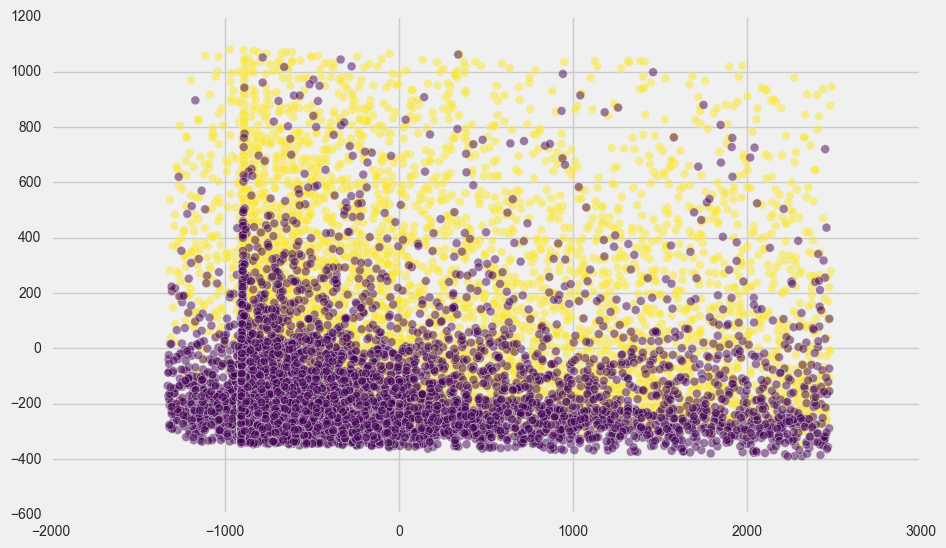

In [19]:
plt.scatter(X_trans[:,0], X_trans[:,1], c = y, s = 40, alpha = 0.5, cmap = plt.cm.viridis)